In [1]:
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import clear_output

import json

import warnings

In [2]:
MODEL_FILE = "1.1. Esembler_Logistic_Application.json"

In [3]:
# logistische Regression
LOG_PARAMS = {
    "random_state" : 0,
    "max_iter" : 500,
    "n_jobs" : -1
}

In [4]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [5]:
# Check if Models exists

In [6]:
model_path = DATASET_DIR / "Models" / MODEL_FILE
MODEL_EXIST = model_path.is_file()

In [7]:
# Daten

In [8]:
app_train = pd.read_csv(DATASET_DIR / "4. FillNA" / "application.csv")
app_train = app_train.set_index("SK_ID_CURR")

In [9]:
app_train.head()

,TARGET,A_CODE_GENDER,A_NAME_INCOME_TYPE,A_NAME_EDUCATION_TYPE,A_FLAG_EMP_PHONE,A_OCCUPATION_TYPE,A_REGION_RATING_CLIENT,A_REG_CITY_NOT_WORK_CITY,A_ORGANIZATION_TYPE,A_FLAG_DOCUMENT_3,A_CNT_CHILDREN,A_OBS_60_CNT_SOCIAL_CIRCLE,A_DEF_60_CNT_SOCIAL_CIRCLE,A_AMT_REQ_CREDIT_BUREAU_HOUR,A_AMT_REQ_CREDIT_BUREAU_DAY,A_AMT_REQ_CREDIT_BUREAU_WEEK,A_AMT_REQ_CREDIT_BUREAU_MON,A_AMT_REQ_CREDIT_BUREAU_QRT,A_AMT_REQ_CREDIT_BUREAU_YEAR,A_AMT_INCOME_TOTAL,A_AMT_CREDIT,A_AMT_ANNUITY,A_REGION_POPULATION_RELATIVE,A_DAYS_BIRTH,A_DAYS_EMPLOYED,A_DAYS_REGISTRATION,A_DAYS_ID_PUBLISH,A_EXT_SOURCE_1,A_EXT_SOURCE_2,A_EXT_SOURCE_3,A_BASEMENTAREA_AVG,A_YEARS_BEGINEXPLUATATION_AVG,A_LANDAREA_AVG,A_NONLIVINGAREA_AVG,A_TOTALAREA_MODE,A_CREDIT/INCOME
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,-1.388135,-0.889689,-0.570906,0.468697,-0.595378,-0.103064,-0.547236,-0.880189,0.639065,-0.577538,0.249898,5.244279,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-0.481452,0.753514,-0.478095,-0.166146,-0.149452,1.506880,0.747179,0.379837,0.579154,-1.985644,-1.316049,-1.906536,-0.625225,-1.532792,-0.362552,-0.605218,-0.815606,-0.775388
100003,0,0.720307,-0.063874,1.061891,0.468697,-0.334305,-2.067573,-0.547236,-0.787990,0.639065,-0.577538,-0.170305,-0.276157,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-1.016414,1.807957,1.725450,0.592666,-1.252750,-0.166821,0.511543,1.078697,1.790855,-0.904298,0.564499,-0.881616,-0.431140,0.367355,-0.656948,-0.244640,-0.289839,0.619147
100004,0,-1.388135,-0.889689,-0.570906,0.468697,-0.595378,-0.103064,-0.547236,-0.695790,-1.564786,-0.577538,-0.590509,-0.276157,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-1.016414,-1.355372,-1.152888,-1.404649,-0.783451,-0.689509,0.923371,0.206116,0.306869,0.225335,0.217311,1.122507,-0.125363,-0.007700,0.060295,-0.017947,-0.113792,-0.779341
100006,0,0.720307,-0.889689,-0.570906,0.468697,-0.595378,-0.103064,-0.547236,-0.880189,0.639065,-0.577538,0.249898,-0.276157,0.013443,-0.014269,0.043103,-0.063112,-0.016686,0.161762,-0.300929,-0.711430,0.177865,-0.928991,-0.680114,-0.280039,-1.375829,0.369143,0.756194,0.712075,0.253308,-0.120643,-0.293229,0.059827,-0.095792,-0.193759,-0.620905
100007,0,-1.388135,-0.889689,-0.570906,0.468697,-0.334305,-0.103064,1.827367,-0.603590,-1.564786,-0.577538,-0.590509,-0.276157,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-1.016414,-0.511818,-0.213734,-0.361748,0.563570,-0.892535,-0.279611,0.191639,-0.307263,0.231241,-1.003112,0.218030,-0.184786,0.023835,-0.167035,-0.023118,-0.221850,0.334249


In [10]:
# Ermittlung Reihenfolge

In [11]:
y = app_train["TARGET"]
x = app_train.drop(["TARGET"], axis=1)

In [12]:
if not MODEL_EXIST:
    # unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

    model = LogisticRegression(**LOG_PARAMS).fit(x_train, y_train)

    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    print(auc)

    # Koeffizienten der einzelnen Klassen
    coef_dict = {}
    for coef, feat in zip(model.coef_[0], x.columns.values):
        coef_dict[feat] = np.abs(coef)

    # Feature Importance
    d = dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse=True))
    order = list(d.keys())
    
    model_data = {
    "todo" : order,
    "keep" : [],
    "drop" : [],
    "params" : LOG_PARAMS,
    "auc" : [],
    "p" : [],
    "n" : []
    }
    
    auc_temp = 0.5

0.740709502904056


In [13]:
if MODEL_EXIST:
    with open(DATASET_DIR / "Models" / MODEL_FILE, 'r') as file:
        model_data = json.load(file)
    auc_temp = model_data["auc"][-1]

In [14]:
#Logistische Regression Parameterbestimmung

In [15]:
df = app_train

print('auc: %s, todo: %s, keep: %s, drop: %s' % (round(auc_temp,4), len(model_data["todo"]), len(model_data["keep"]), len(model_data["drop"])))
todo = model_data["todo"].copy()

for head in todo:
    
    model_data["keep"].append(head)
    
    X = df[model_data["keep"]]
    y = df["TARGET"]
    x = X
    
    model = LogisticRegression(**LOG_PARAMS).fit(x, y)
    
    aucs = []

    kfold = KFold(5, shuffle=True, random_state=1)

    for train, test in kfold.split(x):
        model.fit(x.iloc[train], y.iloc[train])
        auc = roc_auc_score(y.iloc[test], model.predict_proba(x.iloc[test])[:,1])
        aucs.append(auc)
    
    auc = np.mean(aucs)
    n = len(X)
    p = len(X.columns) - 1 # dont count Target
    
    if auc > auc_temp:
        
        model_data["auc"].append(auc)
        model_data["p"].append(p)
        model_data["n"].append(n)
        
        auc_temp = auc
        
    else:
        model_data["keep"].remove(head)
        model_data["drop"].append(head)
    
    model_data["todo"].remove(head)
    
    with open(DATASET_DIR / "Models" / MODEL_FILE, 'w') as file:
        json.dump(model_data, file)
    
    clear_output(wait=True)
    print('auc: %s, todo: %s, keep: %s, drop: %s' % (round(auc,4), len(model_data["todo"]), len(model_data["keep"]), len(model_data["drop"])))

auc: 0.7393, todo: 0, keep: 27, drop: 8


         auc   p       n
26  0.739294  26  307511


<AxesSubplot:>

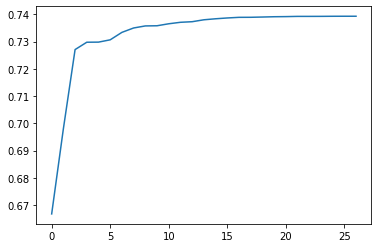

In [16]:
data = {
    "auc" : model_data["auc"],
    "p" : model_data["p"],
    "n" : model_data["n"]
}

result = pd.DataFrame(data)

print(result[result["auc"] == result["auc"].max()])
result["auc"].plot()

In [17]:
model_data["keep"]

['A_EXT_SOURCE_3',
 'A_EXT_SOURCE_1',
 'A_EXT_SOURCE_2',
 'A_DAYS_BIRTH',
 'A_AMT_CREDIT',
 'A_CREDIT/INCOME',
 'A_DAYS_EMPLOYED',
 'A_FLAG_DOCUMENT_3',
 'A_AMT_ANNUITY',
 'A_AMT_INCOME_TOTAL',
 'A_NAME_EDUCATION_TYPE',
 'A_CODE_GENDER',
 'A_LANDAREA_AVG',
 'A_DEF_60_CNT_SOCIAL_CIRCLE',
 'A_DAYS_ID_PUBLISH',
 'A_REGION_RATING_CLIENT',
 'A_NAME_INCOME_TYPE',
 'A_BASEMENTAREA_AVG',
 'A_ORGANIZATION_TYPE',
 'A_AMT_REQ_CREDIT_BUREAU_QRT',
 'A_AMT_REQ_CREDIT_BUREAU_MON',
 'A_AMT_REQ_CREDIT_BUREAU_YEAR',
 'A_YEARS_BEGINEXPLUATATION_AVG',
 'A_FLAG_EMP_PHONE',
 'A_REG_CITY_NOT_WORK_CITY',
 'A_OCCUPATION_TYPE',
 'A_NONLIVINGAREA_AVG']

In [18]:
model_data["drop"]

['A_TOTALAREA_MODE',
 'A_AMT_REQ_CREDIT_BUREAU_DAY',
 'A_AMT_REQ_CREDIT_BUREAU_WEEK',
 'A_AMT_REQ_CREDIT_BUREAU_HOUR',
 'A_REGION_POPULATION_RELATIVE',
 'A_CNT_CHILDREN',
 'A_OBS_60_CNT_SOCIAL_CIRCLE',
 'A_DAYS_REGISTRATION']

In [19]:
model = LogisticRegression(**LOG_PARAMS)

aucs = []

kfold = KFold(5, shuffle=True, random_state=1)
data = df[model_data["keep"]]

X = df[model_data["keep"] + ["TARGET"]]
y = X["TARGET"]
x = X.drop(["TARGET"], axis=1)

for ID_TRAIN, ID_TEST in kfold.split(data):
    
    x_train = x.iloc[ID_TRAIN]
    y_train = y.iloc[ID_TRAIN]
    x_test = x.iloc[ID_TEST]
    y_test = y.iloc[ID_TEST]
    
    model.fit(x_train, y_train)
    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    aucs.append(auc)
    
    print('train: %s, test: %s, auc: %s' % (ID_TRAIN, ID_TEST, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

train: [     0      2      3 ... 307508 307509 307510], test: [     1      4      6 ... 307493 307495 307501], auc: 0.7466907293441365
train: [     0      1      2 ... 307508 307509 307510], test: [     3     18     22 ... 307499 307503 307504], auc: 0.7368223696401557
train: [     0      1      2 ... 307508 307509 307510], test: [     9     10     15 ... 307489 307492 307502], auc: 0.7386266049321821
train: [     0      1      2 ... 307506 307507 307508], test: [    12     16     23 ... 307505 307509 307510], auc: 0.7366392409965578
train: [     1      3      4 ... 307505 307509 307510], test: [     0      2      5 ... 307506 307507 307508], auc: 0.7376912879940658


Durchschnitt: 0.74
Standardabw.: 0.00
Varianz:      0.00


In [20]:
actual = app_train.iloc[ID_TEST][["TARGET"]].copy()

In [21]:
predicted = pd.DataFrame(model.predict_proba(x_test), index=actual.index)

In [22]:
test = pd.merge(actual, predicted, how="left", left_index=True, right_index=True)

In [23]:
test.head()

,TARGET,0,1
SK_ID_CURR,,,
100002,1,0.476644,0.523356
100004,0,0.961172,0.038828
100008,0,0.889944,0.110056
100010,0,0.957834,0.042166
100015,0,0.973385,0.026615


In [24]:
test[test["TARGET"] == 1].head()

,TARGET,0,1
SK_ID_CURR,,,
100002,1,0.476644,0.523356
100031,1,0.810006,0.189994
100047,1,0.840917,0.159083
100547,1,0.640423,0.359577
100616,1,0.832405,0.167595


In [25]:
test[test["TARGET"] == 1][0].mean()

0.8526890142823266